- Importing necessary packages

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import fredapi as fd
import plotly.express as px
import datetime
import pandas_datareader as pdr

- Generate Fred API key

In [22]:
fred  = fd.Fred(api_key='66d2b7f16684ef3e554a446c21ea4859')

- set start and end date to filter the data

In [23]:
start_date = datetime.datetime(1900, 1, 1)	
end_date = datetime.datetime(2023, 1, 1)

- Get GDP, Net exports, Personal consumption expenditure, Goverment spending expenditure and Private consumption investment

In [24]:
df_gdp = pdr.get_data_fred('NGDPSAXDCUSQ', start_date, end_date)
df_gdp=df_gdp.reset_index()
df_gdp= df_gdp.rename(columns={'NGDPSAXDCUSQ':'gdp'})
df_gdp

,DATE,gdp
0,1950-01-01,70207.0
1,1950-04-01,72595.8
2,1950-07-01,77038.3
3,1950-10-01,79986.3
4,1951-01-01,84000.0
...,...,...
288,2022-01-01,6257279.0
289,2022-04-01,6386068.3
290,2022-07-01,6498659.8
291,2022-10-01,6602101.3


In [25]:
df_netExports = pdr.get_data_fred('NETEXC', start_date, end_date)
df_netExports=df_netExports.reset_index()
df_netExports= df_netExports.rename(columns={'NETEXC':'netExports'})
df_netExports


,DATE,netExports
0,1970-01-01,-58.811
1,1970-04-01,-56.426
2,1970-07-01,-55.074
3,1970-10-01,-58.546
4,1971-01-01,-53.771
...,...,...
208,2022-01-01,-1141.052
209,2022-04-01,-1116.196
210,2022-07-01,-981.230
211,2022-10-01,-965.569


In [26]:
df_privateDomesticInvestment = pdr.get_data_fred('GPDIC1', start_date, end_date)
df_privateDomesticInvestment=df_privateDomesticInvestment.reset_index()
df_privateDomesticInvestment= df_privateDomesticInvestment.rename(columns={'GPDIC1':'privateDomesticInvestment'})
df_privateDomesticInvestment

,DATE,privateDomesticInvestment
0,1947-01-01,227.242
1,1947-04-01,209.836
2,1947-07-01,203.662
3,1947-10-01,243.072
4,1948-01-01,268.012
...,...,...
300,2022-01-01,4222.449
301,2022-04-01,4105.540
302,2022-07-01,4024.750
303,2022-10-01,4058.491


In [27]:
df_personalConsumptionExpenditures = pdr.get_data_fred('PCE', start_date, end_date)
df_personalConsumptionExpenditures=df_personalConsumptionExpenditures.reset_index()
df_personalConsumptionExpenditures= df_personalConsumptionExpenditures.rename(columns={'PCE':'personalConsumptionExpenditures'})
df_personalConsumptionExpenditures

,DATE,personalConsumptionExpenditures
0,1959-01-01,306.1
1,1959-02-01,309.6
2,1959-03-01,312.7
3,1959-04-01,312.2
4,1959-05-01,316.1
...,...,...
764,2022-09-01,17804.0
765,2022-10-01,17915.1
766,2022-11-01,17892.5
767,2022-12-01,17943.6


In [28]:
df_governmentTotalExpenditures = pdr.get_data_fred('W068RCQ027SBEA', start_date, end_date)
df_governmentTotalExpenditures= df_governmentTotalExpenditures.rename(columns={'W068RCQ027SBEA':'governmentTotalExpenditures'})
df_governmentTotalExpenditures =df_governmentTotalExpenditures.reset_index()
df_governmentTotalExpenditures

,DATE,governmentTotalExpenditures
0,1960-01-01,144.233
1,1960-04-01,147.417
2,1960-07-01,150.459
3,1960-10-01,153.780
4,1961-01-01,157.254
...,...,...
248,2022-01-01,8330.638
249,2022-04-01,8774.527
250,2022-07-01,8894.032
251,2022-10-01,9175.833


- Merge DataFrames using Date as an primary key

In [29]:
from functools import reduce
dfs = [df_gdp,df_personalConsumptionExpenditures,df_netExports,df_privateDomesticInvestment,df_governmentTotalExpenditures]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='DATE'), dfs)
merged_df

,DATE,gdp,personalConsumptionExpenditures,netExports,privateDomesticInvestment,governmentTotalExpenditures
0,1970-01-01,262800.0,628.7,-58.811,600.116,325.878
1,1970-04-01,266843.8,636.0,-56.426,601.421,339.049
2,1970-07-01,271514.8,648.5,-55.074,611.208,346.412
3,1970-10-01,272152.0,658.3,-58.546,578.757,354.250
4,1971-01-01,283789.0,676.1,-53.771,646.232,358.566
...,...,...,...,...,...,...
208,2022-01-01,6257279.0,16888.6,-1141.052,4222.449,8330.638
209,2022-04-01,6386068.3,17310.5,-1116.196,4105.540,8774.527
210,2022-07-01,6498659.8,17556.4,-981.230,4024.750,8894.032
211,2022-10-01,6602101.3,17915.1,-965.569,4058.491,9175.833


In [30]:
nan_check = merged_df.isna().any().any()
if nan_check:
    print("DataFrame contains NaN value")
else:
    print("DataFrame does not contian NaN values")

DataFrame does not contian NaN values


 - Handling Duplicates

In [31]:
merged_df=merged_df.drop_duplicates()
merged_df

,DATE,gdp,personalConsumptionExpenditures,netExports,privateDomesticInvestment,governmentTotalExpenditures
0,1970-01-01,262800.0,628.7,-58.811,600.116,325.878
1,1970-04-01,266843.8,636.0,-56.426,601.421,339.049
2,1970-07-01,271514.8,648.5,-55.074,611.208,346.412
3,1970-10-01,272152.0,658.3,-58.546,578.757,354.250
4,1971-01-01,283789.0,676.1,-53.771,646.232,358.566
...,...,...,...,...,...,...
208,2022-01-01,6257279.0,16888.6,-1141.052,4222.449,8330.638
209,2022-04-01,6386068.3,17310.5,-1116.196,4105.540,8774.527
210,2022-07-01,6498659.8,17556.4,-981.230,4024.750,8894.032
211,2022-10-01,6602101.3,17915.1,-965.569,4058.491,9175.833


- Handling Missing Values

In [32]:
merged_df=merged_df.dropna()
merged_df

,DATE,gdp,personalConsumptionExpenditures,netExports,privateDomesticInvestment,governmentTotalExpenditures
0,1970-01-01,262800.0,628.7,-58.811,600.116,325.878
1,1970-04-01,266843.8,636.0,-56.426,601.421,339.049
2,1970-07-01,271514.8,648.5,-55.074,611.208,346.412
3,1970-10-01,272152.0,658.3,-58.546,578.757,354.250
4,1971-01-01,283789.0,676.1,-53.771,646.232,358.566
...,...,...,...,...,...,...
208,2022-01-01,6257279.0,16888.6,-1141.052,4222.449,8330.638
209,2022-04-01,6386068.3,17310.5,-1116.196,4105.540,8774.527
210,2022-07-01,6498659.8,17556.4,-981.230,4024.750,8894.032
211,2022-10-01,6602101.3,17915.1,-965.569,4058.491,9175.833


In [35]:
fig = px.line(df_gdp, x='DATE', y='gdp', title='gdp graph')
fig.show()

Mean Squared Error: 1033808428.26
R-squared: 1.00


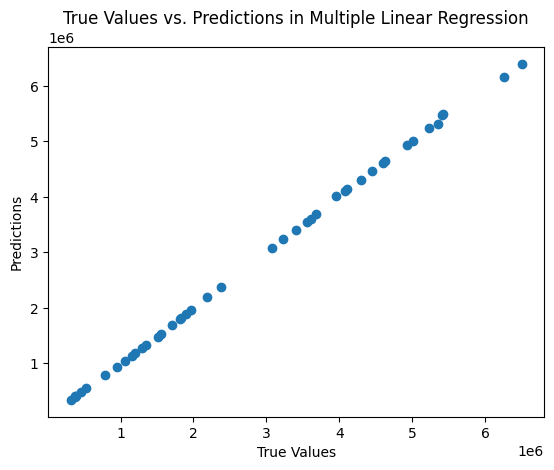

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X = merged_df[['personalConsumptionExpenditures', 'netExports', 'privateDomesticInvestment', 'governmentTotalExpenditures']]
y = merged_df['gdp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions in Multiple Linear Regression')
plt.show()
